## Part 2: Optimized NumPy Implementation

1. Mean Squared Error Calculation

In [1]:
import numpy as np

def mse_np(y_pred, y_true):
    m = len(y_true)
    return np.sum((y_pred - y_true) ** 2) / (2 * m)

2. Gradient Descent Algorithm

- Hyperparamters : Learning Rate, Epochs

In [2]:
import numpy as np

def gradient_descent_np(X, y, alpha=0.1, epochs=1000):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0.0
    cost_history = []

    for epoch in range(epochs):
        y_pred = X.dot(weights) + bias
        error = y_pred - y

        dw = (1/m) * (X.T.dot(error))
        db = (1/m) * np.sum(error)

        weights = weights - alpha*dw
        bias = bias - alpha*db

        cost = mse_np(y_pred, y)
        cost_history.append(cost)

        if epoch > 0 and abs(cost_history[-2] - cost_history[-1]) < 1e-6:
            break

    return weights, bias, cost_history

3. Standardization

In [3]:
import numpy as np

def standardize_X(X):
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    stds[stds == 0] = 1.0
    X_std = (X - means) / stds
    return X_std, means, stds

def standardize_y(y):
    mean = np.mean(y)
    std_dev = np.std(y)
    std_dev = std_dev if std_dev > 0 else 1.0
    y_std = (y - mean) / std_dev
    return y_std, mean, std_dev

4. Prediction

In [4]:
def predict(X, weights, bias, y_mean, y_std):
    y_std_pred = X.dot(weights) + bias
    predictions = y_std_pred * y_std + y_mean
    return predictions

5. Load csv (Equivalent to read_csv function of pandas)

In [5]:
def load_csv_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    data = [list(map(float, line.strip().split(','))) for line in lines[1:]]
    X = [row[:-1] for row in data]
    y = [row[-1] for row in data]
    return X, y

X, y = load_csv_data("data.csv")

6. Evaluation Metrics

- MAE
- RMSE
- R2 Score

In [6]:
import numpy as np

def mae_np(y_pred, y_true):
    return np.mean(np.abs(y_pred - y_true))

def rmse_np(y_pred, y_true):
    return np.sqrt(np.mean((y_pred - y_true) ** 2))

def r2_score_np(y_pred, y_true):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)


7. Cost Convergence Graph

In [7]:
import matplotlib.pyplot as plt

def plot_loss(cost_history):
    plt.plot(cost_history)
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.title("Training Loss Curve for Numpy Implementation")
    plt.grid(True)
    plt.show()


### Main function for evaluating above algorithms

Training Time: 0.6303877830505371
Final Cost: 0.17791838853885095
Final Weights: [-0.11802489 -0.16599277  0.1110931   0.65819245 -0.24826425  0.01988954
  0.00259174 -0.02696935 -0.08450791  0.02445282 -0.24452576]
Final Bias: 0.013820637008771026
Training MAE: 49499.40811212691
Training RMSE: 67716.47357977643
Training R2 Score: 0.6441697202625878
Testing MAE: 48974.65750198297
Testing RMSE: 68926.53961924021
Testing R2 Score: 0.6739635561041


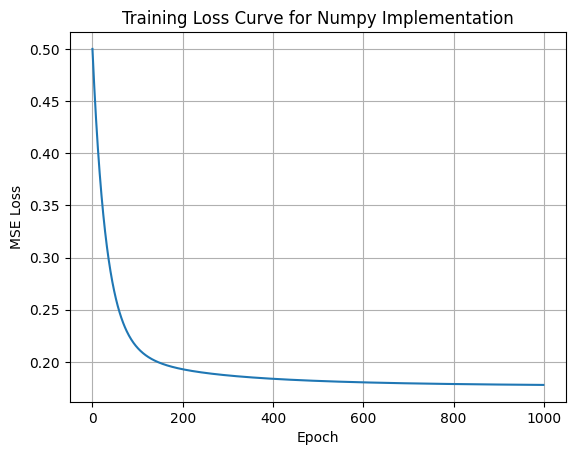

In [8]:
import time

def main():
    X, y = load_csv_data("data.csv")

    X_std, means, stds = standardize_X(X)

    train_size = int(0.8 * len(X))

    X_train = X_std[:train_size]
    X_test = X_std[train_size:]

    y_train_raw = y[:train_size]
    y_test_raw = y[train_size:]

    y_train, y_mean, y_std_dev = standardize_y(y_train_raw)

    start_time = time.time()
    weights, bias, cost_history = gradient_descent_np(X_train, y_train, alpha=0.01, epochs=1000)
    end_time = time.time()

    print("Training Time:", end_time - start_time)
    print("Final Cost:", cost_history[-1])
    print("Final Weights:", weights)
    print("Final Bias:", bias)

    predictions_train = predict(X_train, weights, bias, y_mean, y_std_dev)
    predictions_test = predict(X_test, weights, bias, y_mean, y_std_dev)

    print("Training MAE:", mae_np(predictions_train, y_train_raw))
    print("Training RMSE:", rmse_np(predictions_train, y_train_raw))
    print("Training R2 Score:", r2_score_np(predictions_train, y_train_raw))

    print("Testing MAE:", mae_np(predictions_test, y_test_raw))
    print("Testing RMSE:", rmse_np(predictions_test, y_test_raw))
    print("Testing R2 Score:", r2_score_np(predictions_test, y_test_raw))

    plot_loss(cost_history)

if __name__ == "__main__":
    main()
